# Sección 3

## Prueba Data Science
### Candidato: LUIS IVAN UMPIRE ALVAREZ

# Caso Ventas de autos y motocicletas

### Modelado de datos

Dentro de las variables se identifica cuatro tablas que son:

●	**Cliente**: ID Cliente, Nombre del cliente, ciudad, país, dirección, teléfono, territorio, etc.

●	**Producto**: Código del producto, precio base del producto.

●	**Orden**: Número de orden de la venta, ID Cliente, Fecha de la venta, Año, Trimestre, Mes y Estado de la venta.

●	**Detalle de la venta**: ID Cliente, Número de Orden de la venta, Código del producto, Cantidad ordenada, precio unitario del producto, venta del producto.



In [196]:
# importar las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Extraer el archivo fuente

Solo vamos a extraer la hoja 'sales_data_sample', porque es una **fact table**, es decir que ahí podemos obtener toda la información transaccional de las ventas.

In [197]:

df_sales = pd.read_excel('venta_vehiculos.xlsx', sheet_name='sales_data_sample')

### Overview a la información

In [198]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [199]:
df_sales.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10100,30,100.00,3,"5,151.00",1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
1,10100,50,67.80,2,"3,390.00",1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2,10100,22,86.51,4,"1,903.22",1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
3,10100,49,34.47,1,"1,689.03",1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
4,10101,25,100.00,4,"3,782.00",1/9/2003 0:00,Shipped,1,1,2003,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium
5,10101,26,100.00,1,"3,773.38",1/9/2003 0:00,Shipped,1,1,2003,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium
6,10101,45,31.20,3,"1,404.00",1/9/2003 0:00,Shipped,1,1,2003,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Small
7,10101,46,53.76,2,"2,472.96",1/9/2003 0:00,Shipped,1,1,2003,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Small
8,10102,39,100.00,2,"4,808.31",1/10/2003 0:00,Shipped,1,1,2003,...,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,NaN,Frick,Michael,Medium
9,10102,41,50.14,1,"2,055.74",1/10/2003 0:00,Shipped,1,1,2003,...,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,NaN,Frick,Michael,Small


In [200]:
df_sales.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,"2,823.00","2,823.00","2,823.00","2,823.00","2,823.00","2,823.00","2,823.00","2,823.00","2,823.00"
mean,"10,258.73",35.09,83.66,6.47,"3,553.89",2.72,7.09,"2,003.82",100.72
std,92.09,9.74,20.17,4.23,"1,841.87",1.20,3.66,0.70,40.19
min,"10,100.00",6.00,26.88,1.00,482.13,1.00,1.00,"2,003.00",33.00
25%,"10,180.00",27.00,68.86,3.00,"2,203.43",2.00,4.00,"2,003.00",68.00
50%,"10,262.00",35.00,95.70,6.00,"3,184.80",3.00,8.00,"2,004.00",99.00
75%,"10,333.50",43.00,100.00,9.00,"4,508.00",4.00,11.00,"2,004.00",124.00
max,"10,425.00",97.00,100.00,18.00,"14,082.80",4.00,12.00,"2,005.00",214.00


# 1- Análisis descriptivo

### Ver los valores únicos de las columnas de mayor interés

In [201]:
print('STATUS: ', df_sales['STATUS'].unique())
print('\nQTR_ID: ', df_sales['QTR_ID'].unique())
print('\nMONTH_ID: ', df_sales['MONTH_ID'].unique())
print('\nYEAR_ID: ', df_sales['YEAR_ID'].unique())
print('\nPRODUCTLINE: ', df_sales['PRODUCTLINE'].unique())
print('\nCUSTOMERNAME: ', df_sales['CUSTOMERNAME'].unique())
print('\nCITY: ', df_sales['CITY'].unique())
print('\nCOUNTRY: ', df_sales['COUNTRY'].unique())


STATUS:  ['Shipped' 'Resolved' 'Cancelled' 'On Hold' 'Disputed' 'In Process']

QTR_ID:  [1 2 3 4]

MONTH_ID:  [ 1  2  3  4  5  6  7  8  9 10 11 12]

YEAR_ID:  [2003 2004 2005]

PRODUCTLINE:  ['Vintage Cars' 'Classic Cars' 'Trucks and Buses' 'Trains' 'Ships'
 'Planes' 'Motorcycles']

CUSTOMERNAME:  ['Online Diecast Creations Co.' 'Blauer See Auto, Co.' 'Vitachrome Inc.'
 'Baane Mini Imports' 'Euro Shopping Channel' 'Danish Wholesale Imports'
 'Rovelli Gifts' 'Land of Toys Inc.' 'Cruz & Sons Co.'
 'Motor Mint Distributors Inc.' 'AV Stores, Co.' 'Mini Wheels Co.'
 'Volvo Model Replicas, Co' 'Mini Gifts Distributors Ltd.'
 "La Corne D'abondance, Co." 'Classic Legends Inc.' 'Royale Belge'
 'Dragon Souveniers, Ltd.' 'Enaco Distributors' 'Salzburg Collectables'
 'Australian Collectors, Co.' 'Reims Collectables' 'Marseille Mini Autos'
 'Atelier graphique' 'Signal Gift Stores' 'Corrida Auto Replicas, Ltd'
 'Muscle Machine Inc' 'Stylish Desk Decors, Co.' 'Auto-Moto Classics Inc.'
 'Gift Ideas Co

In [202]:
pd.options.display.float_format = '{:,.2f}'.format

In [203]:
# Ventas por YEAR_ID:
df_sales_year = df_sales.pivot_table(index=None, 
                                         columns='YEAR_ID', 
                                         values='SALES', 
                                         aggfunc='sum', 
                                         margins=False)

df_sales_year = df_sales_year.reset_index()
df_sales_year

YEAR_ID,index,2003,2004,2005
0,SALES,"3,516,979.54","4,724,162.60","1,791,486.71"


In [204]:
# Ventas por STATUS:
df_sales_status = df_sales.pivot_table(index='STATUS', 
                                         columns='YEAR_ID', 
                                         values='SALES', 
                                         aggfunc='sum', 
                                         margins=True)

df_sales_status = df_sales_status.reset_index()
df_sales_status

YEAR_ID,STATUS,2003,2004,2005,All
0,Cancelled,"48,710.92","145,776.56",NaN,"194,487.48"
1,Disputed,NaN,NaN,"72,212.86","72,212.86"
2,In Process,NaN,NaN,"144,729.96","144,729.96"
3,On Hold,NaN,"26,260.21","152,718.98","178,979.19"
4,Resolved,"28,550.59","24,078.61","98,089.08","150,718.28"
5,Shipped,"3,439,718.03","4,528,047.22","1,323,735.83","9,291,501.08"
6,All,"3,516,979.54","4,724,162.60","1,791,486.71","10,032,628.85"


In [205]:
# Ventas por PRODUCTLINE:
df_sales_line = df_sales.pivot_table(index='PRODUCTLINE', 
                                         columns='YEAR_ID', 
                                         values='SALES', 
                                         aggfunc='sum', 
                                         margins=True)

df_sales_line = df_sales_line.reset_index()

df_sales_line.sort_values('All', ascending=True)

YEAR_ID,PRODUCTLINE,2003,2004,2005,All
4,Trains,"72,802.29","116,523.85","36,917.33","226,243.47"
3,Ships,"244,821.09","341,437.97","128,178.07","714,437.13"
2,Planes,"272,257.60","502,671.80","200,074.17","975,003.57"
5,Trucks and Buses,"420,429.93","529,302.89","178,057.02","1,127,789.84"
1,Motorcycles,"370,895.58","560,545.23","234,947.53","1,166,388.34"
6,Vintage Cars,"650,987.76","911,423.77","340,739.31","1,903,150.84"
0,Classic Cars,"1,484,785.29","1,762,257.09","672,573.28","3,919,615.66"
7,All,"3,516,979.54","4,724,162.60","1,791,486.71","10,032,628.85"


In [206]:
# Ventas por CITY:
df_sales_city = df_sales.pivot_table(index='CITY', 
                                         columns='YEAR_ID', 
                                         values='SALES', 
                                         aggfunc='sum', 
                                         margins=False)

df_sales_city = df_sales_city.reset_index()
df_sales_city

YEAR_ID,CITY,2003,2004,2005
0,Aaarhus,"40,321.61","60,273.94",NaN
1,Allentown,NaN,"115,971.34","6,166.80"
2,Barcelona,"48,228.51","30,183.35",NaN
3,Bergamo,"96,259.03","41,696.69",NaN
4,Bergen,"95,277.18","16,363.10",NaN
...,...,...,...,...
68,Toulouse,"55,349.32",NaN,"15,139.12"
69,Tsawassen,NaN,"74,634.85",NaN
70,Vancouver,"38,662.21","36,576.71",NaN
71,Versailles,NaN,"64,834.32",NaN


In [207]:
# Ventas por COUNTRY:
df_sales_country = df_sales.pivot_table(index='COUNTRY', 
                                         columns='YEAR_ID', 
                                         values='SALES', 
                                         aggfunc='sum', 
                                         margins=True)

df_sales_country = df_sales_country.reset_index()
df_sales_country.sort_values('All', ascending=True)

YEAR_ID,COUNTRY,2003,2004,2005,All
8,Ireland,NaN,"57,756.43",NaN,"57,756.43"
12,Philippines,"78,086.98","15,928.75",NaN,"94,015.73"
2,Belgium,"3,348.46","80,024.05","25,040.11","108,412.62"
16,Switzerland,NaN,"117,713.56",NaN,"117,713.56"
10,Japan,NaN,"149,422.47","38,745.34","188,167.81"
1,Austria,"82,117.88","51,694.39","68,250.26","202,062.53"
15,Sweden,"58,459.92","119,947.57","31,606.72","210,014.21"
7,Germany,"70,053.31","150,418.78",NaN,"220,472.09"
3,Canada,"54,609.50","135,776.09","33,692.97","224,078.56"
4,Denmark,"99,192.72","120,431.56","26,012.87","245,637.15"


### Resumen

- Los paises donde mas se venden son **USA, Spain, y France**.

- En el año 2005 disminuyen las ventas, esto puede deberse a qué no se cuenta con información de ventas de todo el 2005, hay que averiguar por Quarter.

- Los **'Classic Cars' y 'Vintage Cars'** son los mas vendidos.


In [208]:
# Ventas por YEAR_ID:
df_sales_quarter = df_sales.pivot_table(index='QTR_ID', 
                                         columns='YEAR_ID', 
                                         values='SALES', 
                                         aggfunc='sum', 
                                         margins=False)

df_sales_quarter = df_sales_quarter.reset_index()
df_sales_quarter

YEAR_ID,QTR_ID,2003,2004,2005
0,1,"445,094.69","833,730.68","1,071,992.36"
1,2,"562,365.22","766,260.73","719,494.35"
2,3,"649,514.54","1,109,396.27",NaN
3,4,"1,860,005.09","2,014,774.92",NaN


**Efectivamente, las ventas del 2005 no consideran todo el año, sino solamente hasta el 2nd quarter.**

In [209]:
df_sales_2003 = df_sales[df_sales['YEAR_ID'] != 2003]
df_sales_2003.head(10)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
975,10208,46,100.00,13,"8,602.92",1/2/2004 0:00,Shipped,1,1,2004,...,"2, rue du Commerce",NaN,Lyon,NaN,69004,France,EMEA,Saveley,Mary,Large
976,10208,26,100.00,14,"3,142.36",1/2/2004 0:00,Shipped,1,1,2004,...,"2, rue du Commerce",NaN,Lyon,NaN,69004,France,EMEA,Saveley,Mary,Medium
977,10208,20,100.00,12,"3,114.40",1/2/2004 0:00,Shipped,1,1,2004,...,"2, rue du Commerce",NaN,Lyon,NaN,69004,France,EMEA,Saveley,Mary,Medium
978,10208,24,100.00,9,"2,622.48",1/2/2004 0:00,Shipped,1,1,2004,...,"2, rue du Commerce",NaN,Lyon,NaN,69004,France,EMEA,Saveley,Mary,Small
979,10208,48,100.00,11,"5,614.56",1/2/2004 0:00,Shipped,1,1,2004,...,"2, rue du Commerce",NaN,Lyon,NaN,69004,France,EMEA,Saveley,Mary,Medium
980,10208,45,87.77,8,"3,949.65",1/2/2004 0:00,Shipped,1,1,2004,...,"2, rue du Commerce",NaN,Lyon,NaN,69004,France,EMEA,Saveley,Mary,Medium
981,10208,35,100.00,7,"4,301.15",1/2/2004 0:00,Shipped,1,1,2004,...,"2, rue du Commerce",NaN,Lyon,NaN,69004,France,EMEA,Saveley,Mary,Medium
982,10208,20,89.40,2,"1,788.00",1/2/2004 0:00,Shipped,1,1,2004,...,"2, rue du Commerce",NaN,Lyon,NaN,69004,France,EMEA,Saveley,Mary,Small
983,10208,30,65.61,15,"1,968.30",1/2/2004 0:00,Shipped,1,1,2004,...,"2, rue du Commerce",NaN,Lyon,NaN,69004,France,EMEA,Saveley,Mary,Small
984,10208,38,74.67,3,"2,837.46",1/2/2004 0:00,Shipped,1,1,2004,...,"2, rue du Commerce",NaN,Lyon,NaN,69004,France,EMEA,Saveley,Mary,Small


In [210]:
df_sales_2004 = df_sales[df_sales['YEAR_ID'] != 2004]
df_sales_2004.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10100,30,100.00,3,"5,151.00",1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
1,10100,50,67.80,2,"3,390.00",1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2,10100,22,86.51,4,"1,903.22",1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
3,10100,49,34.47,1,"1,689.03",1/6/2003 0:00,Shipped,1,1,2003,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
4,10101,25,100.00,4,"3,782.00",1/9/2003 0:00,Shipped,1,1,2003,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium
5,10101,26,100.00,1,"3,773.38",1/9/2003 0:00,Shipped,1,1,2003,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Medium
6,10101,45,31.20,3,"1,404.00",1/9/2003 0:00,Shipped,1,1,2003,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Small
7,10101,46,53.76,2,"2,472.96",1/9/2003 0:00,Shipped,1,1,2003,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Small
8,10102,39,100.00,2,"4,808.31",1/10/2003 0:00,Shipped,1,1,2003,...,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,NaN,Frick,Michael,Medium
9,10102,41,50.14,1,"2,055.74",1/10/2003 0:00,Shipped,1,1,2003,...,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,NaN,Frick,Michael,Small


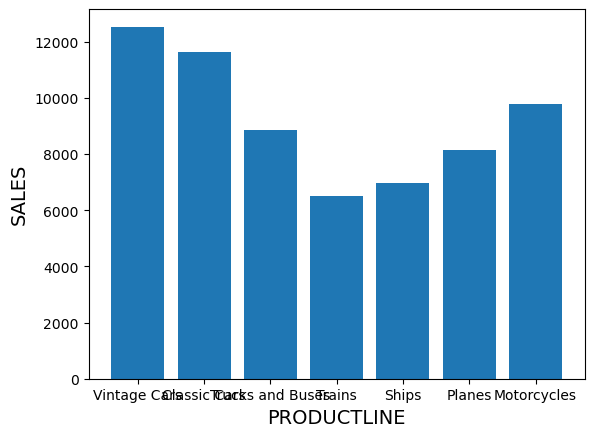

In [211]:
plt.bar(df_sales_20032004['PRODUCTLINE'],df_sales_20032004['SALES'])
plt.xlabel('PRODUCTLINE', fontsize=14)
plt.ylabel('SALES', fontsize=14)
plt.show()


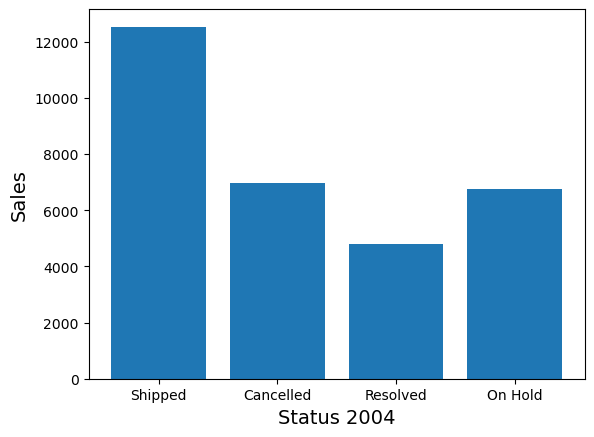

In [212]:
df_2004 = df_sales[df_sales['YEAR_ID']==2004]
plt.bar(df_2004['STATUS'],df_2004['SALES'])
plt.xlabel('Status 2004', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.show()

# 3- Segmentación por Clustering

- La **hipótesis** es que existen grupos de clientes que genera ordenes de compra similares (mix de productos similares). 

- Si esta hipótesis es cierta, cuando un cliente compre un producto de ese mix, puedo ofrecerle otros productos del mix, asi elevar el ticket medio de compra.

- Let's do it:

Las dos variables que utilizaremos para construir los clusters deben ser **ORDERNUMBER** y **PRODUCTCODE**, esta última variable está asociado a un producto en la tabla Producto.

In [213]:
df_sales['ORDERNUMBER'].head(10)

0    10100
1    10100
2    10100
3    10100
4    10101
5    10101
6    10101
7    10101
8    10102
9    10102
Name: ORDERNUMBER, dtype: int64

In [214]:
size_ORDERNUMBER = df_sales['ORDERNUMBER'].unique().size
size_ORDERNUMBER

307

In [215]:
df_sales['ORDERNUMBER'].unique()

array([10100, 10101, 10102, 10103, 10104, 10105, 10106, 10107, 10108,
       10109, 10110, 10111, 10112, 10113, 10114, 10115, 10116, 10117,
       10118, 10119, 10120, 10121, 10122, 10123, 10124, 10125, 10126,
       10127, 10128, 10129, 10130, 10131, 10133, 10134, 10135, 10136,
       10137, 10139, 10140, 10141, 10142, 10143, 10144, 10145, 10146,
       10147, 10148, 10149, 10150, 10151, 10152, 10153, 10154, 10155,
       10156, 10158, 10159, 10160, 10161, 10162, 10163, 10164, 10165,
       10166, 10167, 10168, 10169, 10170, 10171, 10172, 10173, 10174,
       10175, 10176, 10177, 10178, 10180, 10181, 10182, 10183, 10184,
       10185, 10186, 10188, 10189, 10190, 10191, 10192, 10193, 10194,
       10195, 10196, 10197, 10198, 10199, 10201, 10203, 10204, 10205,
       10206, 10207, 10208, 10209, 10210, 10211, 10212, 10213, 10214,
       10215, 10216, 10217, 10219, 10220, 10221, 10222, 10223, 10224,
       10225, 10226, 10227, 10228, 10229, 10230, 10231, 10232, 10233,
       10235, 10236,

In [216]:
df_sales['PRODUCTCODE'].head(10)

0    S18_1749
1    S18_2248
2    S18_4409
3    S24_3969
4    S18_2325
5    S18_2795
6    S24_1937
7    S24_2022
8    S18_1342
9    S18_1367
Name: PRODUCTCODE, dtype: object

In [217]:
size_PRODUCTCODE = df_sales['PRODUCTCODE'].unique().size
size_PRODUCTCODE

109

#### df_sales['PRODUCTCODE'] y df_sales['ORDERNUMBER'] deben pasarse a valores numericos y luego escalarlos

In [226]:
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import MinMaxScaler

le = LabelEncoder()
le.fit_transform(y_train)
# le.inverse_transform([0,1,2])


array([  0,   0,   0, ..., 306, 306, 306])

In [227]:
y_train = df_sales['ORDERNUMBER']
y_train_transformed = le.fit_transform(y_train)
y_train_transformed

array([  0,   0,   0, ..., 306, 306, 306])

In [228]:
x_train = df_sales['PRODUCTCODE']

x_train_transformed = le.fit_transform(x_train)
x_train_transformed

array([22, 26, 48, ..., 83, 86, 92])

In [237]:
xt = x_train_transformed.reshape(-1,1)
yt = y_train_transformed.reshape(-1,1)

In [241]:
xt

array([[22],
       [26],
       [48],
       ...,
       [83],
       [86],
       [92]])

In [242]:
yt

array([[  0],
       [  0],
       [  0],
       ...,
       [306],
       [306],
       [306]])

In [251]:
xt_l = xt.tolist()
yt_l = yt.tolist()

In [247]:
dfx = pd.DataFrame(xt_l, columns=['x'])
dfy = pd.DataFrame(yt_l, columns=['y'])


In [250]:
df = pd.concat([dfx, dfy], axis=1)
df

,x,y
0,22,0
1,26,0
2,48,0
3,78,0
4,28,1
...,...,...
2818,63,306
2819,66,306
2820,83,306
2821,86,306


In [253]:
from sklearn.cluster import KMeans
escaler = MinMaxScaler().fit(df.values)

df_e = pd.DataFrame(escaler.transform(df.values),
                       columns=["x", "y"])

kmeans = KMeans(n_clusters=7).fit(df.values)


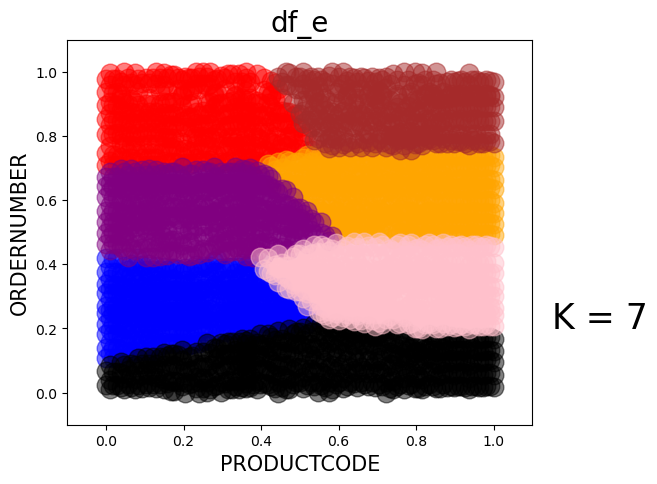

In [257]:
df_e["cluster"] = kmeans.labels_

# Instrucciones para graficar los clusters 

plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(df_e[df_e["cluster"] == cluster]["x"],
                df_e[df_e["cluster"] == cluster]["y"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1], 
                marker="P", s=280, color=colores[cluster])

plt.title("df_e", fontsize=20)
plt.xlabel("PRODUCTCODE", fontsize=15)
plt.ylabel("ORDERNUMBER", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
# plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)    
plt.show()

del df_e["cluster"] 